<a href="https://colab.research.google.com/github/Elizajr/CursoMetodosComputacionales/blob/main/Pato_interpolaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consideremos la imagen ![paloma](https://github.com/hernansalinas/Metodos_Computacionales_taller/blob/main/Asignaciones/Tareas/Enunciados_2021_02/figuras/Fig.png?raw=true).

Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib
import numpy as np
import PIL
import requests
from io import BytesIO
import scipy as sp
import pandas as pd

In [ ]:
url="https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png"
response=requests.get(url)
abrir=PIL.Image.open(BytesIO(response.content))
abrir.size

(334, 225)

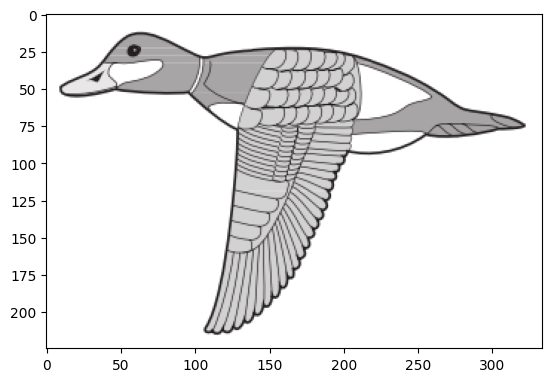

In [ ]:
plt.figure()
plt.imshow(abrir)
plt.show()

In [ ]:
#===============================================================================
# Definimos los arreglos
#===============================================================================

x = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
y = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

dicc = {"x":x,"y":y}
df = pd.DataFrame(dicc)
df.head()

,x,y
0,0.9,1.30
1,1.3,1.50
2,1.9,1.85
3,2.1,2.10
4,2.6,2.60


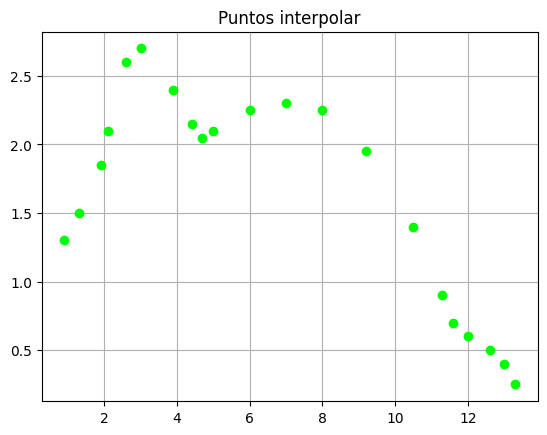

In [ ]:
plt.figure()
plt.plot(x,y,"o",c="lime")
plt.title("Puntos interpolar")
#plt.imshow(abrir)
plt.grid()
plt.show()

## Interpolación

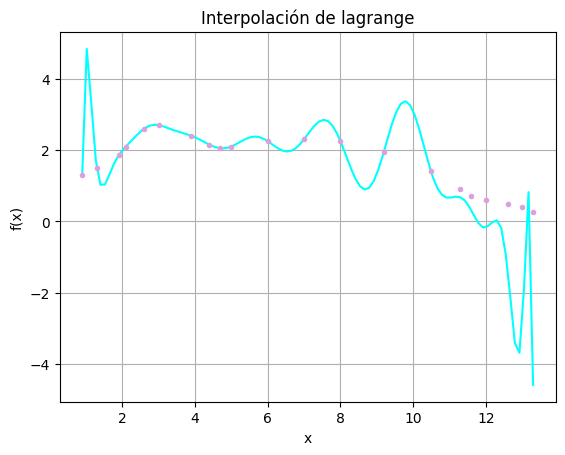

In [ ]:
# Lagrange

px = sp.interpolate.lagrange(x,y)
x2 = np.linspace(np.min(x), np.max(x), 100)

plt.figure()
plt.plot(x2, px(x2), c = "aqua")
plt.plot(df["x"], df["y"], ".", color = "plum")
plt.title("Interpolación de lagrange")
plt.ylabel("f(x)")
plt.xlabel("x")

plt.grid()
plt.show()

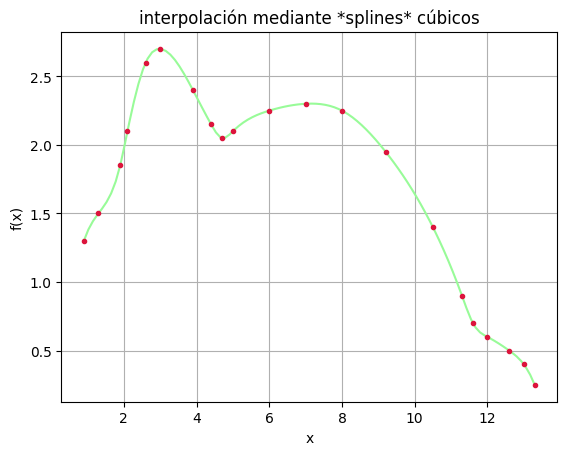

In [ ]:
#splines cúbicos

px2 = sp.interpolate.CubicSpline(x, y)

plt.figure()
plt.plot(x2, px2(x2), c = "palegreen")
plt.plot(df["x"], df["y"], "o", markersize = 3, c = "crimson")
plt.title("interpolación mediante *splines* cúbicos")
plt.ylabel("f(x)")
plt.xlabel("x")

plt.grid()
plt.show()

In [ ]:
def promedio(x):
  return (x[0:len(x)-1]+x[1:len(x)])/2

In [ ]:
xm = promedio(x)
ym = promedio(y)

In [ ]:
#pendientes
dx = np.diff(x)
dy = np.diff(y)
df = dy/dx

In [ ]:
#Función de interpolación
spline = sp.interpolate.CubicHermiteSpline(xm, ym, df)

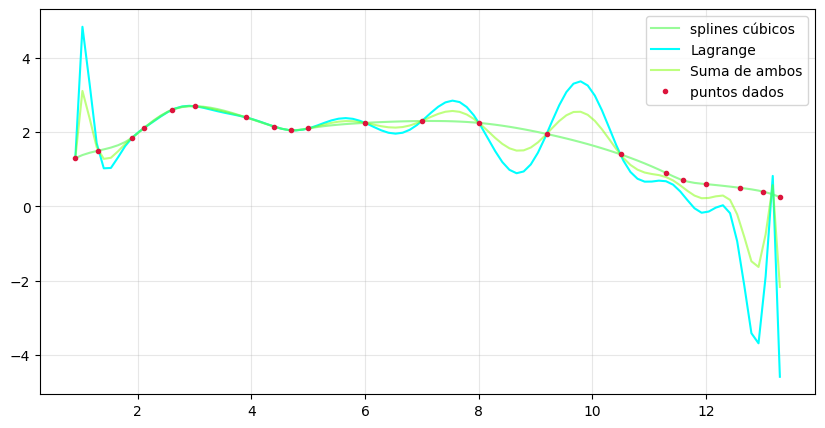

In [ ]:
# Superposición de métodos
plt.figure(figsize=(10, 5))
plt.plot(x2, px2(x2), c = "palegreen")
plt.plot(x2, px(x2), c = "aqua")
plt.plot(x2, (px(x2) + px2(x2))/2, c = "chartreuse",alpha=0.5)
plt.plot(x, y, ".", c = "crimson")
plt.grid(alpha=0.3)
plt.legend(["splines cúbicos","Lagrange","Suma de ambos","puntos dados"])
plt.show()

In [ ]:
abrir.size

(334, 225)

In [ ]:
#pruebas para agregarle la imagen
factorx = 334/np.max(x)
xp = x*factorx
factory = 225/np.max(y)
yp = y*factorx

In [ ]:
np.min(y)

0.25

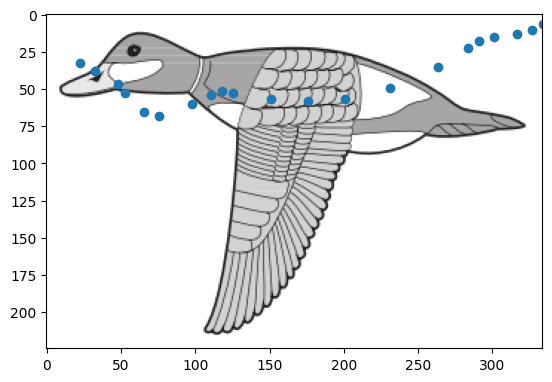

In [ ]:
plt.figure()
plt.plot(xp,yp,"o")
plt.imshow(abrir)